<a href="https://colab.research.google.com/github/mab2004/remoteok-job-skill-analysis/blob/main/remoteok_job_skill_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import & Libraries

In [ ]:
!pip install requests beautifulsoup4 pandas matplotlib seaborn

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Request page source from URL

In [34]:
url = "https://remoteok.com/api"

In [35]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
page = requests.get(url, headers=headers)
page

<Response [200]>

## Use the JSON API

In [38]:
if response.status_code == 200:
    data = response.json()
    # First element is site metadata, jobs start after that
    jobs = data[1:]

    df = pd.DataFrame(jobs)
    print("Total Jobs Scraped via API:", len(df))
    df.head(10)
else:
    print("Failed to fetch jobs:", response.status_code)


Total Jobs Scraped via API: 98


## Clean the DataFrame

In [42]:
# Select only useful columns
clean_df = df[["position", "company", "tags", "date", "url"]].copy()

# Rename columns for clarity
clean_df.rename(columns={
    "position": "Job Title",
    "company": "Company",
    "tags": "Skills",
    "date": "Date Posted",
    "url": "Job URL"
}, inplace=True)

# Convert skills list into comma-separated string
clean_df["Skills"] = clean_df["Skills"].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)

# Save to CSV
csv_filename = "remoteok_jobs.csv"
clean_df.to_csv(csv_filename, index=False, encoding="utf-8")

print(f" Cleaned DataFrame saved to {csv_filename}")
print("Preview of first 10 rows:")
clean_df.head(10)


 Cleaned DataFrame saved to remoteok_jobs.csv
Preview of first 10 rows:


,Job Title,Company,Skills,Date Posted,Job URL
0,Support Specialist and Writer,Interaction Design Foundation,"education, customer support, content writing, ...",2025-09-16T11:01:08+00:00,https://remoteOK.com/remote-jobs/remote-suppor...
1,Generalist Data Annotator No Exp Required,HelixRecruit,"writing, ai",2025-09-14T21:56:30+00:00,https://remoteOK.com/remote-jobs/remote-genera...
2,Global Operations Manager Fashion,Rosie Etienne,"other, ops",2025-09-13T09:07:25+00:00,https://remoteOK.com/remote-jobs/remote-global...
3,Senior Full stack Developer,Lemon.io,"engineer, dev, senior, full stack, javascript,...",2025-09-12T15:19:46+00:00,https://remoteOK.com/remote-jobs/remote-senior...
4,LLM Data Engineer,Sanctuary Computer,"dev, senior, backend, exec, javascript, ruby, ...",2025-09-12T11:44:56+00:00,https://remoteOK.com/remote-jobs/remote-llm-da...
5,Client Success Manager,Venus,marketing,2025-09-09T23:58:18+00:00,https://remoteOK.com/remote-jobs/remote-client...
6,Senior Ruby on Rails Engineer,EverAI,"engineer, dev, technical, backend, full stack,...",2025-09-08T14:58:33+00:00,https://remoteOK.com/remote-jobs/remote-senior...
7,Senior Performance Marketer,EverAI,marketing,2025-09-08T10:00:03+00:00,https://remoteOK.com/remote-jobs/remote-senior...
8,Senior Full Stack Engineer,Aguru UK,"engineer, dev, technical, front end",2025-09-06T15:10:56+00:00,https://remoteOK.com/remote-jobs/remote-senior...
9,Senior DevOps Engineer,Aguru UK,"engineer, technical, backend, devops",2025-09-06T14:38:18+00:00,https://remoteOK.com/remote-jobs/remote-senior...


## Skill Frequency Analysis

Top 15 Most In-Demand Skills:
            Skill  Count
0       technical     41
1         support     38
2        engineer     36
3          health     32
4   digital nomad     29
5        software     29
6          senior     26
7      management     24
8          growth     24
9          design     22
10           lead     22
11    engineering     21
12         system     19
13      marketing     18
14        backend     17


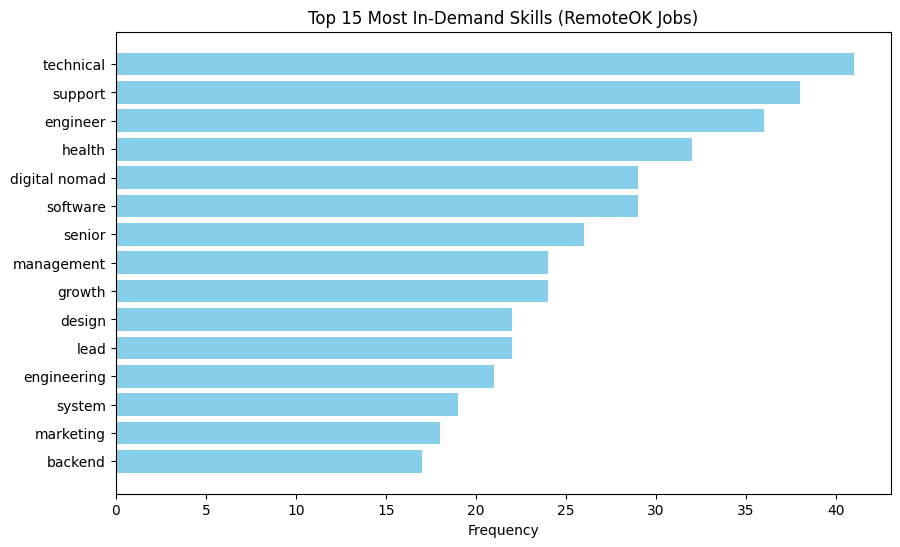

In [43]:
from collections import Counter
import matplotlib.pyplot as plt

# Split skills into a flat list
all_skills = []
for skills in clean_df["Skills"].dropna():
    all_skills.extend([s.strip().lower() for s in skills.split(",")])

# Count frequency
skill_counts = Counter(all_skills).most_common(15)  # Top 15

# Convert to DataFrame for display
skills_df = pd.DataFrame(skill_counts, columns=["Skill", "Count"])

print("Top 15 Most In-Demand Skills:")
print(skills_df)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.barh(skills_df["Skill"], skills_df["Count"], color="skyblue")
plt.gca().invert_yaxis()  # highest at top
plt.xlabel("Frequency")
plt.title("Top 15 Most In-Demand Skills (RemoteOK Jobs)")
plt.show()


In [45]:
skills_df.to_csv("skills_frequency.csv", index=False, encoding="utf-8")
print("Skills frequency data saved to skills_frequency.csv")


Skills frequency data saved to skills_frequency.csv
